## 📱 App Store Genre Prediction

Given *data about apps from the Apple App Store, let's try to predict if a given app is a **game** or not.

We will use a multi-input Tensorflow neural network to make our predictions. 

Data source: https://www.kaggle.com/datasets/ramamet4/app-store-apple-data-set-10k-apps

### Importing Libraries

In [116]:
import numpy as np
import pandas as pd

import matplotlib.pyplot as plt
import seaborn as sns

import re
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split

import tensorflow as tf

from sklearn.metrics import confusion_matrix, classification_report

In [117]:
data = pd.read_csv('AppleStore.csv')
data

,Unnamed: 0,id,track_name,size_bytes,currency,price,rating_count_tot,rating_count_ver,user_rating,user_rating_ver,ver,cont_rating,prime_genre,sup_devices.num,ipadSc_urls.num,lang.num,vpp_lic
0,1,281656475,PAC-MAN Premium,100788224,USD,3.99,21292,26,4.0,4.5,6.3.5,4+,Games,38,5,10,1
1,2,281796108,Evernote - stay organized,158578688,USD,0.00,161065,26,4.0,3.5,8.2.2,4+,Productivity,37,5,23,1
2,3,281940292,"WeatherBug - Local Weather, Radar, Maps, Alerts",100524032,USD,0.00,188583,2822,3.5,4.5,5.0.0,4+,Weather,37,5,3,1
3,4,282614216,"eBay: Best App to Buy, Sell, Save! Online Shop...",128512000,USD,0.00,262241,649,4.0,4.5,5.10.0,12+,Shopping,37,5,9,1
4,5,282935706,Bible,92774400,USD,0.00,985920,5320,4.5,5.0,7.5.1,4+,Reference,37,5,45,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7192,11081,1187617475,Kubik,126644224,USD,0.00,142,75,4.5,4.5,1.3,4+,Games,38,5,1,1
7193,11082,1187682390,VR Roller-Coaster,120760320,USD,0.00,30,30,4.5,4.5,0.9,4+,Games,38,0,1,1
7194,11087,1187779532,Bret Michaels Emojis + Lyric Keyboard,111322112,USD,1.99,15,0,4.5,0.0,1.0.2,9+,Utilities,37,1,1,1
7195,11089,1187838770,VR Roller Coaster World - Virtual Reality,97235968,USD,0.00,85,32,4.5,4.5,1.0.15,12+,Games,38,0,2,1


In [118]:
descriptions = pd.read_csv('appleStore_description.csv').loc[:, ['id', 'app_desc']]
descriptions

,id,app_desc
0,281656475,"SAVE 20%, now only $3.99 for a limited time!\n..."
1,281796108,Let Evernote change the way you organize your ...
2,281940292,Download the most popular free weather app pow...
3,282614216,The eBay app is the best way to find anything ...
4,282935706,On more than 250 million devices around the wo...
...,...,...
7192,1187617475,Place the falling blocks correctly in order to...
7193,1187682390,A thrilling virtual reality roller coaster exp...
7194,1187779532,"Rock star Bret Michaels, winner of Celebrity A..."
7195,1187838770,VR Roller Coaster World is an app for Google C...


### Merge DataFrames

In [119]:
data = data.merge(descriptions, on='id')
data.head()

,Unnamed: 0,id,track_name,size_bytes,currency,price,rating_count_tot,rating_count_ver,user_rating,user_rating_ver,ver,cont_rating,prime_genre,sup_devices.num,ipadSc_urls.num,lang.num,vpp_lic,app_desc
0,1,281656475,PAC-MAN Premium,100788224,USD,3.99,21292,26,4.0,4.5,6.3.5,4+,Games,38,5,10,1,"SAVE 20%, now only $3.99 for a limited time!\n..."
1,2,281796108,Evernote - stay organized,158578688,USD,0.00,161065,26,4.0,3.5,8.2.2,4+,Productivity,37,5,23,1,Let Evernote change the way you organize your ...
2,3,281940292,"WeatherBug - Local Weather, Radar, Maps, Alerts",100524032,USD,0.00,188583,2822,3.5,4.5,5.0.0,4+,Weather,37,5,3,1,Download the most popular free weather app pow...
3,4,282614216,"eBay: Best App to Buy, Sell, Save! Online Shop...",128512000,USD,0.00,262241,649,4.0,4.5,5.10.0,12+,Shopping,37,5,9,1,The eBay app is the best way to find anything ...
4,5,282935706,Bible,92774400,USD,0.00,985920,5320,4.5,5.0,7.5.1,4+,Reference,37,5,45,1,On more than 250 million devices around the wo...


### Preprocessing

In [120]:
df = data.copy()
df

,Unnamed: 0,id,track_name,size_bytes,currency,price,rating_count_tot,rating_count_ver,user_rating,user_rating_ver,ver,cont_rating,prime_genre,sup_devices.num,ipadSc_urls.num,lang.num,vpp_lic,app_desc
0,1,281656475,PAC-MAN Premium,100788224,USD,3.99,21292,26,4.0,4.5,6.3.5,4+,Games,38,5,10,1,"SAVE 20%, now only $3.99 for a limited time!\n..."
1,2,281796108,Evernote - stay organized,158578688,USD,0.00,161065,26,4.0,3.5,8.2.2,4+,Productivity,37,5,23,1,Let Evernote change the way you organize your ...
2,3,281940292,"WeatherBug - Local Weather, Radar, Maps, Alerts",100524032,USD,0.00,188583,2822,3.5,4.5,5.0.0,4+,Weather,37,5,3,1,Download the most popular free weather app pow...
3,4,282614216,"eBay: Best App to Buy, Sell, Save! Online Shop...",128512000,USD,0.00,262241,649,4.0,4.5,5.10.0,12+,Shopping,37,5,9,1,The eBay app is the best way to find anything ...
4,5,282935706,Bible,92774400,USD,0.00,985920,5320,4.5,5.0,7.5.1,4+,Reference,37,5,45,1,On more than 250 million devices around the wo...
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7192,11081,1187617475,Kubik,126644224,USD,0.00,142,75,4.5,4.5,1.3,4+,Games,38,5,1,1,Place the falling blocks correctly in order to...
7193,11082,1187682390,VR Roller-Coaster,120760320,USD,0.00,30,30,4.5,4.5,0.9,4+,Games,38,0,1,1,A thrilling virtual reality roller coaster exp...
7194,11087,1187779532,Bret Michaels Emojis + Lyric Keyboard,111322112,USD,1.99,15,0,4.5,0.0,1.0.2,9+,Utilities,37,1,1,1,"Rock star Bret Michaels, winner of Celebrity A..."
7195,11089,1187838770,VR Roller Coaster World - Virtual Reality,97235968,USD,0.00,85,32,4.5,4.5,1.0.15,12+,Games,38,0,2,1,VR Roller Coaster World is an app for Google C...


In [121]:
# Drop unnecessary columns
df = df.drop(['Unnamed: 0', 'id', 'track_name', 'currency'], axis=1)
df

,size_bytes,price,rating_count_tot,rating_count_ver,user_rating,user_rating_ver,ver,cont_rating,prime_genre,sup_devices.num,ipadSc_urls.num,lang.num,vpp_lic,app_desc
0,100788224,3.99,21292,26,4.0,4.5,6.3.5,4+,Games,38,5,10,1,"SAVE 20%, now only $3.99 for a limited time!\n..."
1,158578688,0.00,161065,26,4.0,3.5,8.2.2,4+,Productivity,37,5,23,1,Let Evernote change the way you organize your ...
2,100524032,0.00,188583,2822,3.5,4.5,5.0.0,4+,Weather,37,5,3,1,Download the most popular free weather app pow...
3,128512000,0.00,262241,649,4.0,4.5,5.10.0,12+,Shopping,37,5,9,1,The eBay app is the best way to find anything ...
4,92774400,0.00,985920,5320,4.5,5.0,7.5.1,4+,Reference,37,5,45,1,On more than 250 million devices around the wo...
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7192,126644224,0.00,142,75,4.5,4.5,1.3,4+,Games,38,5,1,1,Place the falling blocks correctly in order to...
7193,120760320,0.00,30,30,4.5,4.5,0.9,4+,Games,38,0,1,1,A thrilling virtual reality roller coaster exp...
7194,111322112,1.99,15,0,4.5,0.0,1.0.2,9+,Utilities,37,1,1,1,"Rock star Bret Michaels, winner of Celebrity A..."
7195,97235968,0.00,85,32,4.5,4.5,1.0.15,12+,Games,38,0,2,1,VR Roller Coaster World is an app for Google C...


In [122]:
{column: len(df[column].unique()) for column in df.columns}

{'size_bytes': 7107,
 'price': 36,
 'rating_count_tot': 3185,
 'rating_count_ver': 1138,
 'user_rating': 10,
 'user_rating_ver': 10,
 'ver': 1590,
 'cont_rating': 4,
 'prime_genre': 23,
 'sup_devices.num': 20,
 'ipadSc_urls.num': 6,
 'lang.num': 57,
 'vpp_lic': 2,
 'app_desc': 7147}

In [123]:
# Create version features (Practice regular expressions on Regex101.com)
def get_versions(version):
    version = version.replace('iOV', '')
    version = version.replace(' ', '')
    version = version.replace('v', '')
    version = version.replace('b', '')
    version = version.replace('V', '')
    version = version.replace('Update', '')
    version = '1.3.0' if version=='1.3.' else version
    try:
        if version.count('.') == 2:
            major_ver = int(re.search(r'^\d+', version).group(0))
            minor_ver = int(re.search(r'(?<=\.)\d+(?=\.)', version).group(0))
            patch_ver = int(re.search(r'\d+$', version).group(0))
        else:
            major_ver = int(re.search(r'^\d+', version).group(0))
            minor_ver = int(re.search(r'\d+$', version).group(0))
            patch_ver = 0
    except:
        print(version)
    return (major_ver, minor_ver, patch_ver)

In [124]:
get_versions('5333.11100')[0]

5333

In [125]:
df['major_ver'] = df['ver'].apply(lambda x: get_versions(x)[0])
df['minor_ver'] = df['ver'].apply(lambda x: get_versions(x)[1])
df['patch_ver'] = df['ver'].apply(lambda x: get_versions(x)[2])
df = df.drop('ver', axis=1)

In [126]:
df

,size_bytes,price,rating_count_tot,rating_count_ver,user_rating,user_rating_ver,cont_rating,prime_genre,sup_devices.num,ipadSc_urls.num,lang.num,vpp_lic,app_desc,major_ver,minor_ver,patch_ver
0,100788224,3.99,21292,26,4.0,4.5,4+,Games,38,5,10,1,"SAVE 20%, now only $3.99 for a limited time!\n...",6,3,5
1,158578688,0.00,161065,26,4.0,3.5,4+,Productivity,37,5,23,1,Let Evernote change the way you organize your ...,8,2,2
2,100524032,0.00,188583,2822,3.5,4.5,4+,Weather,37,5,3,1,Download the most popular free weather app pow...,5,0,0
3,128512000,0.00,262241,649,4.0,4.5,12+,Shopping,37,5,9,1,The eBay app is the best way to find anything ...,5,10,0
4,92774400,0.00,985920,5320,4.5,5.0,4+,Reference,37,5,45,1,On more than 250 million devices around the wo...,7,5,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7192,126644224,0.00,142,75,4.5,4.5,4+,Games,38,5,1,1,Place the falling blocks correctly in order to...,1,3,0
7193,120760320,0.00,30,30,4.5,4.5,4+,Games,38,0,1,1,A thrilling virtual reality roller coaster exp...,0,9,0
7194,111322112,1.99,15,0,4.5,0.0,9+,Utilities,37,1,1,1,"Rock star Bret Michaels, winner of Celebrity A...",1,0,2
7195,97235968,0.00,85,32,4.5,4.5,12+,Games,38,0,2,1,VR Roller Coaster World is an app for Google C...,1,0,15


In [127]:
# Ordinal encode cont_rating column
df['cont_rating'].unique()

array(['4+', '12+', '17+', '9+'], dtype=object)

In [128]:
cont_ordering = {'4+': 4, '9+': 9, '12+': 12, '17+': 17}
df['cont_rating'] = df['cont_rating'].replace(cont_ordering)

/tmp/ipykernel_154/482253679.py:2: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  df['cont_rating'] = df['cont_rating'].replace(cont_ordering)


In [129]:
def get_sequences(texts, vocab_length=30000):
    tokenizer = tf.keras.preprocessing.text.Tokenizer(num_words=vocab_length)
    tokenizer.fit_on_texts(texts)
    sequences = tokenizer.texts_to_sequences(texts)
    max_seq_len = np.max([len(sequence) for sequence in sequences])
    sequences = tf.keras.preprocessing.sequence.pad_sequences(sequences, maxlen=max_seq_len, padding='post')
    return sequences

In [130]:
# Get app_desc sequences
desc = get_sequences(df['app_desc'])
desc

array([[  140,   560,    74, ...,     0,     0,     0],
       [  289,  2639,   344, ...,     0,     0,     0],
       [  128,     1,    97, ...,     0,     0,     0],
       ...,
       [ 1403,   376, 17743, ...,     0,     0,     0],
       [  702,  3019,  3417, ...,     0,     0,     0],
       [   68,  1672,   887, ...,     0,     0,     0]], dtype=int32)

In [131]:
# Drop app_desc column
df = df.drop('app_desc', axis=1)

In [132]:
# Split df into X and y
y = df['prime_genre'].copy()
X = df.drop('prime_genre', axis=1).copy()

In [133]:
X

,size_bytes,price,rating_count_tot,rating_count_ver,user_rating,user_rating_ver,cont_rating,sup_devices.num,ipadSc_urls.num,lang.num,vpp_lic,major_ver,minor_ver,patch_ver
0,100788224,3.99,21292,26,4.0,4.5,4,38,5,10,1,6,3,5
1,158578688,0.00,161065,26,4.0,3.5,4,37,5,23,1,8,2,2
2,100524032,0.00,188583,2822,3.5,4.5,4,37,5,3,1,5,0,0
3,128512000,0.00,262241,649,4.0,4.5,12,37,5,9,1,5,10,0
4,92774400,0.00,985920,5320,4.5,5.0,4,37,5,45,1,7,5,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7192,126644224,0.00,142,75,4.5,4.5,4,38,5,1,1,1,3,0
7193,120760320,0.00,30,30,4.5,4.5,4,38,0,1,1,0,9,0
7194,111322112,1.99,15,0,4.5,0.0,9,37,1,1,1,1,0,2
7195,97235968,0.00,85,32,4.5,4.5,12,38,0,2,1,1,0,15


In [134]:
# Encode labels
y = y.apply(lambda x: 1 if x == 'Games' else 0)

In [135]:
y

0       1
1       0
2       0
3       0
4       0
       ..
7192    1
7193    1
7194    0
7195    1
7196    1
Name: prime_genre, Length: 7197, dtype: int64

In [136]:
y.value_counts()

prime_genre
1    3862
0    3335
Name: count, dtype: int64

### Modeling

In [144]:
X_train, X_test, desc_train, desc_test, y_train, y_test = train_test_split(X, desc, y, train_size=0.7, shuffle=True, random_state=123)
X_train

,size_bytes,price,rating_count_tot,rating_count_ver,user_rating,user_rating_ver,cont_rating,sup_devices.num,ipadSc_urls.num,lang.num,vpp_lic,major_ver,minor_ver,patch_ver
1039,124789760,3.99,233,2,4.5,4.0,4,37,5,14,1,4,10,0
3533,199975936,0.00,6,1,4.5,2.0,4,24,4,2,1,2,6,1
5183,36356096,1.99,54,3,3.0,5.0,4,37,0,2,1,1,3,1
1243,191521792,0.00,208,0,5.0,0.0,4,37,5,1,1,6,7,4
189,118498304,0.00,117889,725,3.0,4.5,4,38,1,1,1,3,3,3
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5218,132141056,0.00,300,162,4.0,4.0,4,40,5,1,1,1,0,1
4060,69612544,0.00,0,0,0.0,0.0,17,40,5,1,1,1,4,0
1346,116476928,0.00,2130805,579,4.5,4.5,9,38,5,18,1,9,24,12
3454,38805504,0.00,199,199,4.0,4.0,9,43,3,16,0,1,0,0


In [145]:
y_train

1039    1
3533    0
5183    0
1243    0
189     0
       ..
5218    1
4060    1
1346    1
3454    1
3582    1
Name: prime_genre, Length: 5037, dtype: int64

In [146]:
desc

array([[  140,   560,    74, ...,     0,     0,     0],
       [  289,  2639,   344, ...,     0,     0,     0],
       [  128,     1,    97, ...,     0,     0,     0],
       ...,
       [ 1403,   376, 17743, ...,     0,     0,     0],
       [  702,  3019,  3417, ...,     0,     0,     0],
       [   68,  1672,   887, ...,     0,     0,     0]], dtype=int32)

In [147]:
# Scaling X
scaler = StandardScaler()

scaler.fit(X_train)

X_train = pd.DataFrame(scaler.transform(X_train), columns=X_train.columns, index=X_train.index)
X_test = pd.DataFrame(scaler.transform(X_test), columns=X_test.columns, index=X_test.index)

In [148]:
X_train

,size_bytes,price,rating_count_tot,rating_count_ver,user_rating,user_rating_ver,cont_rating,sup_devices.num,ipadSc_urls.num,lang.num,vpp_lic,major_ver,minor_ver,patch_ver
1039,-0.212536,0.423009,-0.157105,-0.139233,0.645224,0.423475,-0.710682,-0.095079,0.652885,1.063380,0.084844,-0.036333,-0.019847,-0.015801
3533,-0.004487,-0.304206,-0.159788,-0.139560,0.645224,-0.668994,-0.710682,-3.608539,0.149659,-0.425431,0.084844,-0.042453,-0.022357,-0.015801
5183,-0.457243,0.058491,-0.159221,-0.138906,-0.331532,0.969710,-0.710682,-0.095079,-1.863245,-0.425431,0.084844,-0.045513,-0.024240,-0.015801
1243,-0.027881,-0.304206,-0.157400,-0.139887,0.970809,-1.761463,-0.710682,-0.095079,0.652885,-0.549498,0.084844,-0.030212,-0.021730,-0.015801
189,-0.229946,-0.304206,1.233693,0.097093,-0.331532,0.696593,-0.710682,0.175187,-1.360019,-0.549498,0.084844,-0.039393,-0.024240,-0.015801
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5218,-0.192195,-0.304206,-0.156313,-0.086934,0.319638,0.423475,-0.710682,0.715720,0.652885,-0.549498,0.084844,-0.045513,-0.026123,-0.015801
4060,-0.365218,-0.304206,-0.159859,-0.139887,-2.285043,-1.761463,2.300198,0.715720,0.652885,-0.549498,0.084844,-0.045513,-0.023613,-0.015801
1346,-0.235539,-0.304206,25.028145,0.049370,0.645224,0.696593,0.447349,0.175187,0.652885,1.559650,0.084844,-0.021032,-0.011060,-0.015801
3454,-0.450465,-0.304206,-0.157507,-0.074840,0.319638,0.423475,0.447349,1.526518,-0.353567,1.311515,-11.786291,-0.045513,-0.026123,-0.015801


Model: "model_3"
__________________________________________________________________________________________________
 Layer (type)                   Output Shape         Param #     Connected to                     
 X_input (InputLayer)           [(None, 14)]         0           []                               
                                                                                                  
 desc_input (InputLayer)        [(None, 771)]        0           []                               
                                                                                                  
 X_dense1 (Dense)               (None, 64)           960         ['X_input[0][0]']                
                                                                                                  
 desc_embedding (Embedding)     (None, 771, 128)     3840000     ['desc_input[0][0]']             
                                                                                            

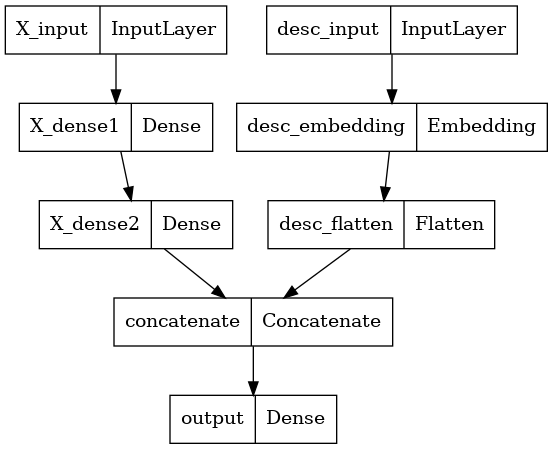

In [149]:
X_inputs = tf.keras.Input(shape=(X_train.shape[1],), name='X_input')
desc_inputs = tf.keras.Input(shape=(desc_train.shape[1],), name='desc_input')

X_dense1 = tf.keras.layers.Dense(64, activation='relu', name='X_dense1')(X_inputs)
X_dense2 = tf.keras.layers.Dense(64, activation='relu', name='X_dense2')(X_dense1)

desc_embedding = tf.keras.layers.Embedding(
    input_dim = 30000,
    output_dim = 128,
    input_length= desc_train.shape[1],
    name='desc_embedding'
)(desc_inputs)

desc_flatten = tf.keras.layers.Flatten(name='desc_flatten')(desc_embedding)
concat = tf.keras.layers.concatenate([X_dense2, desc_flatten], name='concatenate')

outputs = tf.keras.layers.Dense(1, activation='sigmoid', name='output')(concat)
model = tf.keras.Model(inputs=[X_inputs, desc_inputs], outputs=outputs)
print(model.summary())
tf.keras.utils.plot_model(model)

### Training

In [150]:
model.compile(
    optimizer = 'adam',
    loss = "binary_crossentropy",
    metrics=['accuracy',
            tf.keras.metrics.AUC(name='auc')]
)

batch_size= 32
epochs = 50

history = model.fit(
    [X_train, desc_train],
    y_train,
    validation_split=0.2,
    batch_size=batch_size,
    epochs=epochs,
    callbacks=[
        tf.keras.callbacks.ReduceLROnPlateau(),
        tf.keras.callbacks.EarlyStopping(
            monitor='val_loss',
            patience=3,
            restore_best_weights=True
        )
    ]
)

Epoch 1/50
126/126 [==============================] - 11s 81ms/step - loss: 0.5050 - accuracy: 0.7431 - auc: 0.8310 - val_loss: 0.2358 - val_accuracy: 0.9157 - val_auc: 0.9730 - lr: 0.0010
Epoch 2/50
126/126 [==============================] - 9s 71ms/step - loss: 0.1378 - accuracy: 0.9516 - auc: 0.9907 - val_loss: 0.1805 - val_accuracy: 0.9286 - val_auc: 0.9822 - lr: 0.0010
Epoch 3/50
126/126 [==============================] - 9s 72ms/step - loss: 0.0624 - accuracy: 0.9809 - auc: 0.9987 - val_loss: 0.1691 - val_accuracy: 0.9276 - val_auc: 0.9822 - lr: 0.0010
Epoch 4/50
126/126 [==============================] - 9s 70ms/step - loss: 0.0382 - accuracy: 0.9873 - auc: 0.9995 - val_loss: 0.1729 - val_accuracy: 0.9296 - val_auc: 0.9819 - lr: 0.0010
Epoch 5/50
126/126 [==============================] - 9s 71ms/step - loss: 0.0283 - accuracy: 0.9911 - auc: 0.9997 - val_loss: 0.1645 - val_accuracy: 0.9345 - val_auc: 0.9836 - lr: 0.0010
Epoch 6/50
126/126 [==============================] - 10s 7

### Results

In [152]:
model.evaluate([X_test, desc_test], y_test)

68/68 [==============================] - 1s 8ms/step - loss: 0.1679 - accuracy: 0.9412 - auc: 0.9844


[0.1679052710533142, 0.9412037134170532, 0.9844051003456116]

In [154]:
y_pred = np.squeeze(model.predict([X_test, desc_test]))
y_pred

68/68 [==============================] - 1s 8ms/step


array([0.996691  , 0.29326707, 0.27094612, ..., 0.9999518 , 0.06357954,
       0.9990095 ], dtype=float32)

In [155]:
y_pred = np.array(y_pred >= 0.5, dtype=int)

In [156]:
y_pred

array([1, 0, 0, ..., 1, 0, 1])

In [157]:
y_true = np.array(y_test)

In [158]:
cm = confusion_matrix(y_true, y_pred)
cm

array([[ 960,   80],
       [  47, 1073]])

In [159]:
clr = classification_report(y_true, y_pred, target_names=['Other', 'Games'])
print(clr)

              precision    recall  f1-score   support

       Other       0.95      0.92      0.94      1040
       Games       0.93      0.96      0.94      1120

    accuracy                           0.94      2160
   macro avg       0.94      0.94      0.94      2160
weighted avg       0.94      0.94      0.94      2160



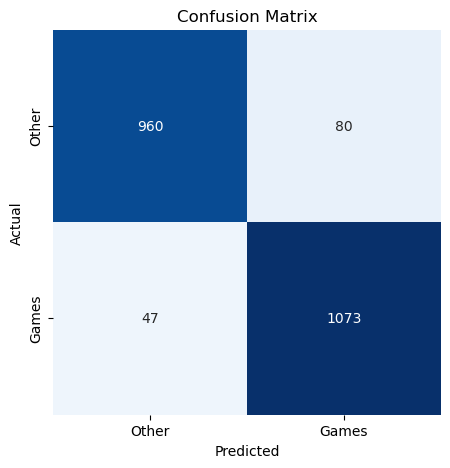

In [160]:
plt.figure(figsize=(5,5))
sns.heatmap(cm, annot=True, vmin=0, fmt='g', cbar=False, cmap='Blues')
plt.xticks(np.arange(2) + 0.5, ['Other', 'Games'])
plt.xlabel('Predicted')
plt.yticks(np.arange(2) + 0.5, ['Other', 'Games'])
plt.ylabel('Actual')
plt.title('Confusion Matrix')
plt.show()